In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dataset

In [2]:
Adult = pd.read_csv("C:/Users/jaiko/Desktop/WB2/phpMawTba.csv",encoding="utf-8")
Adult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
Adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
Adult.shape

(48842, 15)

In [5]:
Adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Duplikaty

In [6]:
duplicate_rows_df = Adult[Adult.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
Adult = Adult.drop_duplicates()

number of duplicate rows:  (52, 15)


## Brakujące dane

In [50]:
for i in range(15):
    if (Adult.iloc[:,i].dtype != 'int64'):
        Adult.iloc[:,i] = Adult.iloc[:,i].str.strip()
        
Adult[Adult.values == "?"].shape

(6456, 15)

In [8]:
for i in range(15):
    if (Adult.iloc[:,i].dtype != 'int64'):
        if(Adult.iloc[:,i].values == '?').any():
            print(""+ Adult.columns[i])
            print((Adult.iloc[:,i].values == '?').sum())

workclass
2795
occupation
2805
native-country
856


## Simple Boxplots

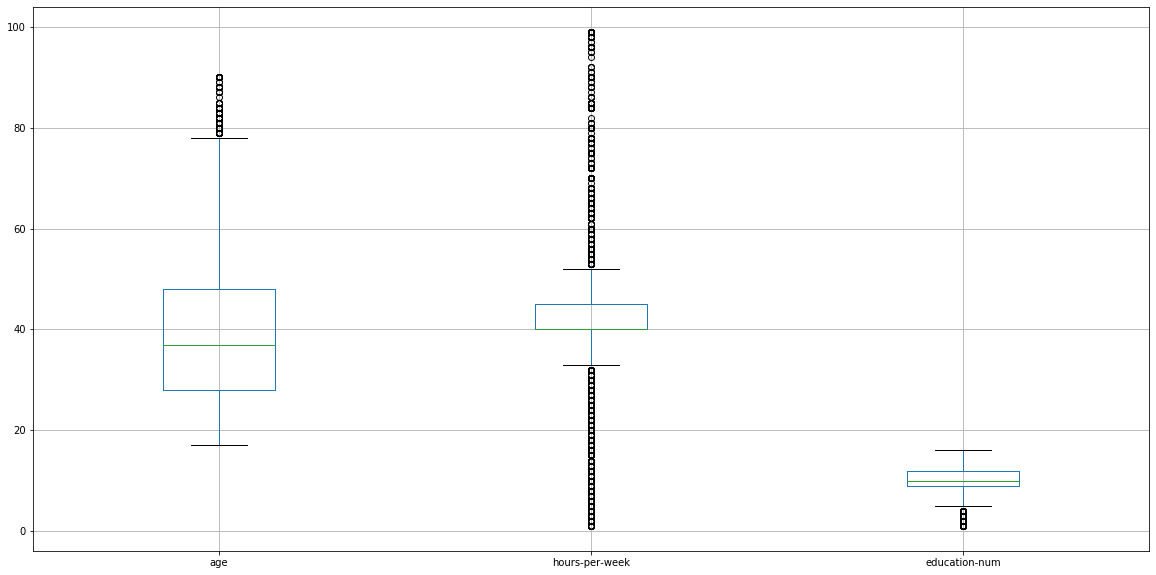

In [9]:
Adult.boxplot(column = ["age", "hours-per-week","education-num"], figsize = (20,10))

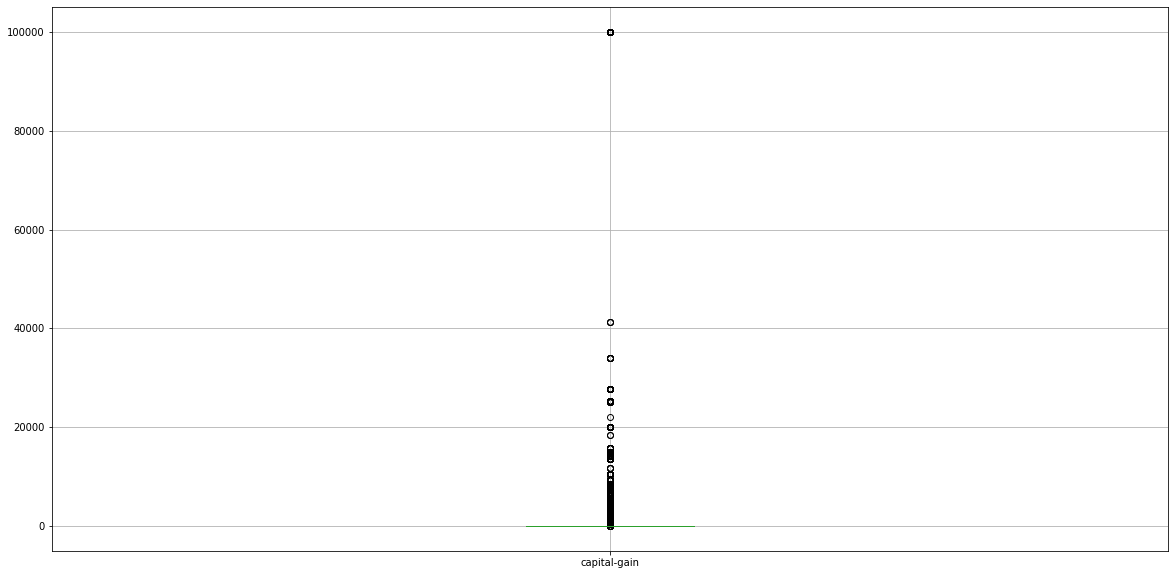

In [10]:
Adult.boxplot(column = ["capital-gain"], figsize = (20,10))

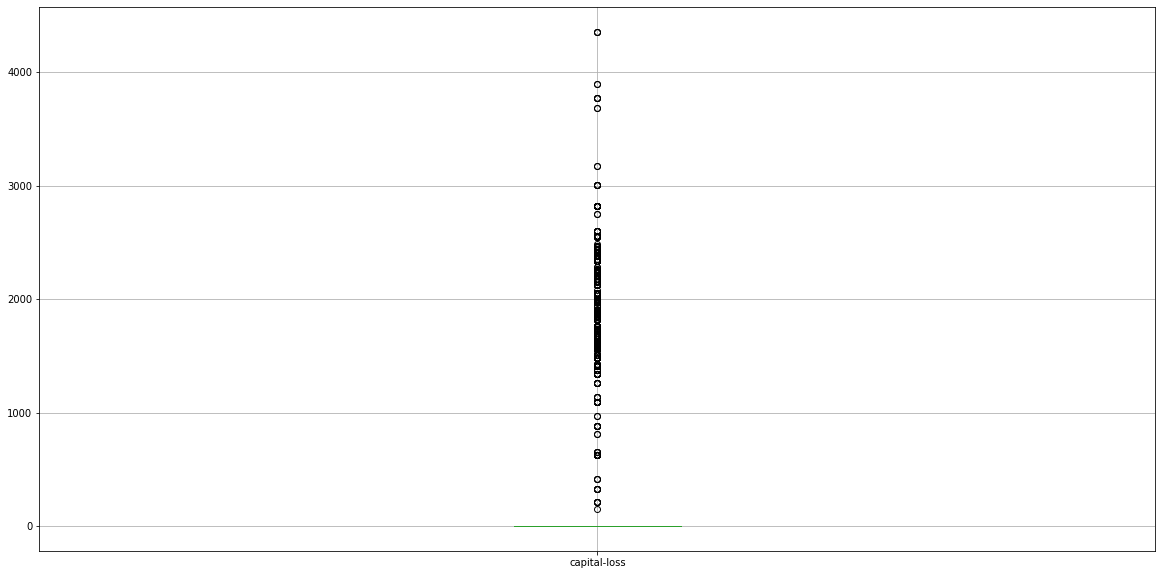

In [11]:
Adult.boxplot(column = ["capital-loss"], figsize = (20,10))

## Outliers


In [12]:
Q1 = Adult.quantile(0.25)
Q3 = Adult.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age                   20.00
fnlwgt            120051.25
education-num          3.00
capital-gain           0.00
capital-loss           0.00
hours-per-week         5.00
dtype: float64


In [13]:
Num = Adult[["age", "fnlwgt", "education-num","capital-gain","capital-loss","hours-per-week"]]

In [14]:
df = Num[~((Num < (Q1-1.5 * IQR)) |(Num > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(28523, 6)

## Histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADD9060C08>,
      dtype=object)

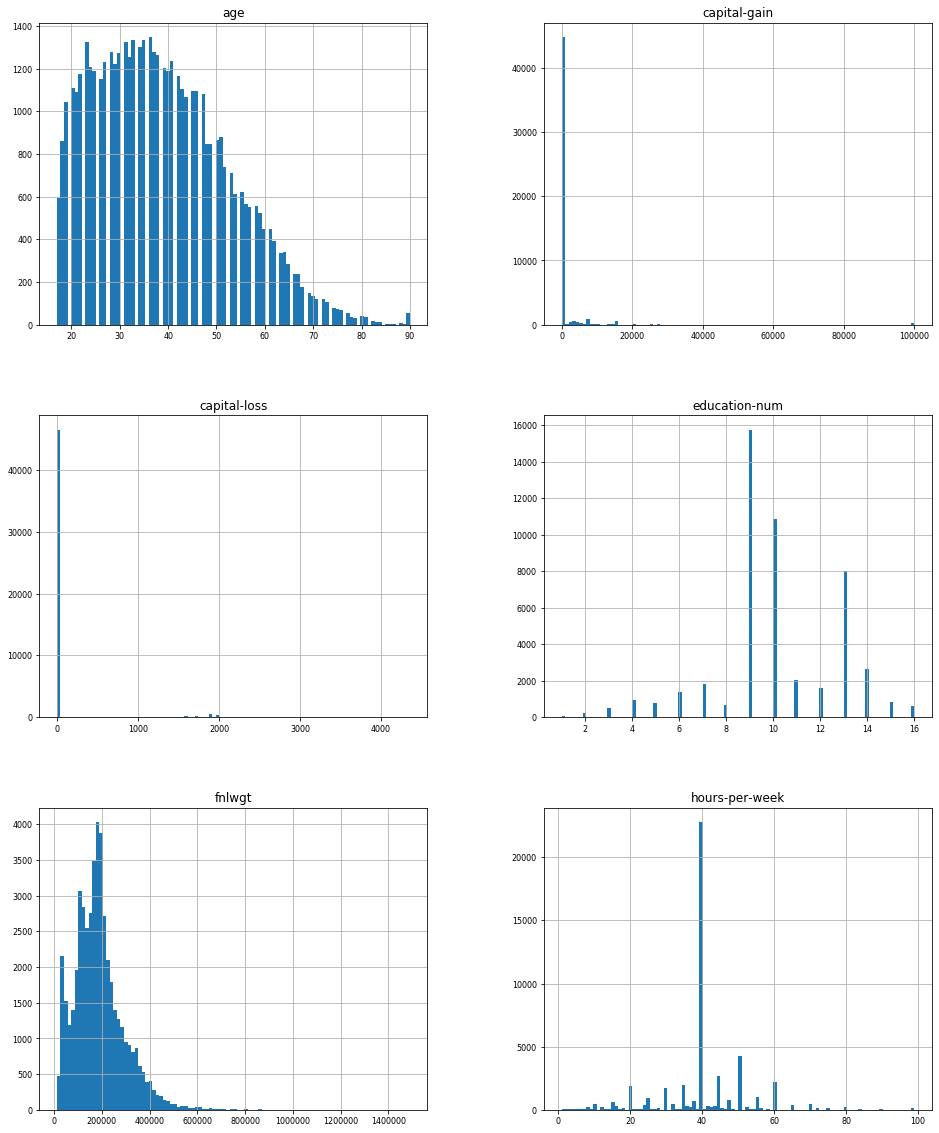

In [15]:
Adult.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

## Correlations

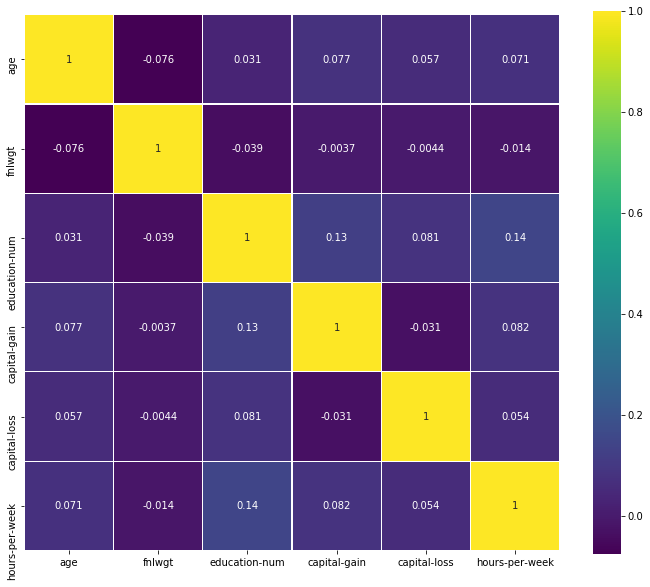

In [16]:
corr = Adult.drop('class', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr, 
            cmap='viridis', linewidths=0.1,
            annot=True,  square=True);

# Szczegółowe zależności


## Edukacja a przychód

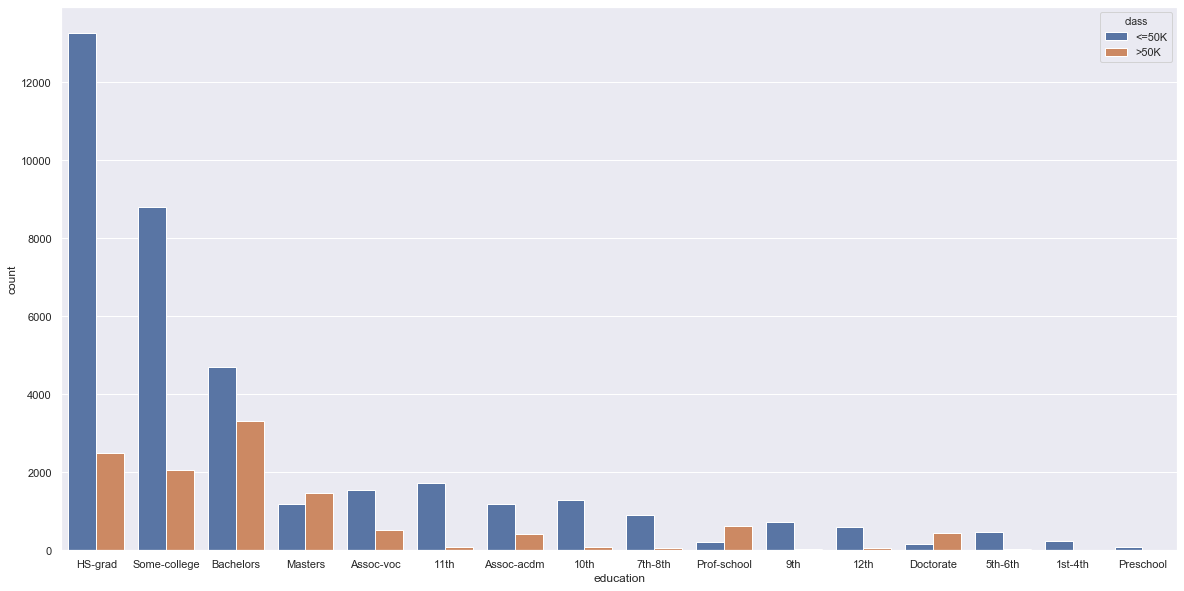

<Figure size 864x720 with 0 Axes>

In [29]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='education', hue="class", data=Adult, order = Adult['education'].value_counts().index)
plt.figure(figsize=(12, 10))
plt.show()

## Obszar zatrudnienia a przychód

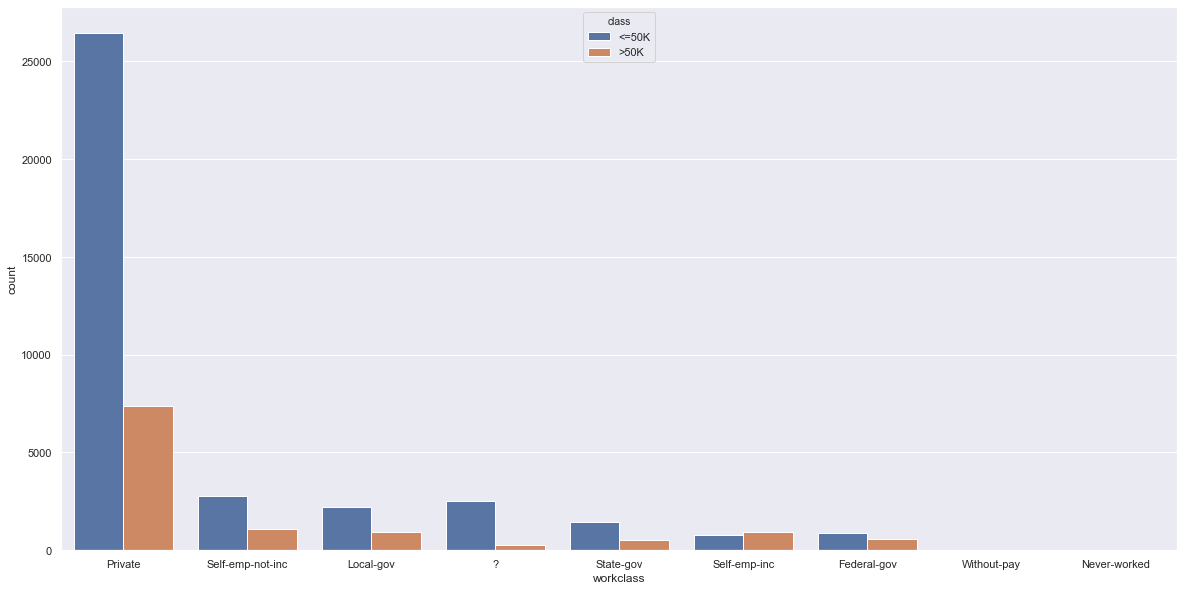

<Figure size 864x720 with 0 Axes>

In [30]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='workclass', hue="class", data=Adult, order = Adult['workclass'].value_counts().index)
plt.figure(figsize=(12, 10))
plt.show()

## Wiek a przychód

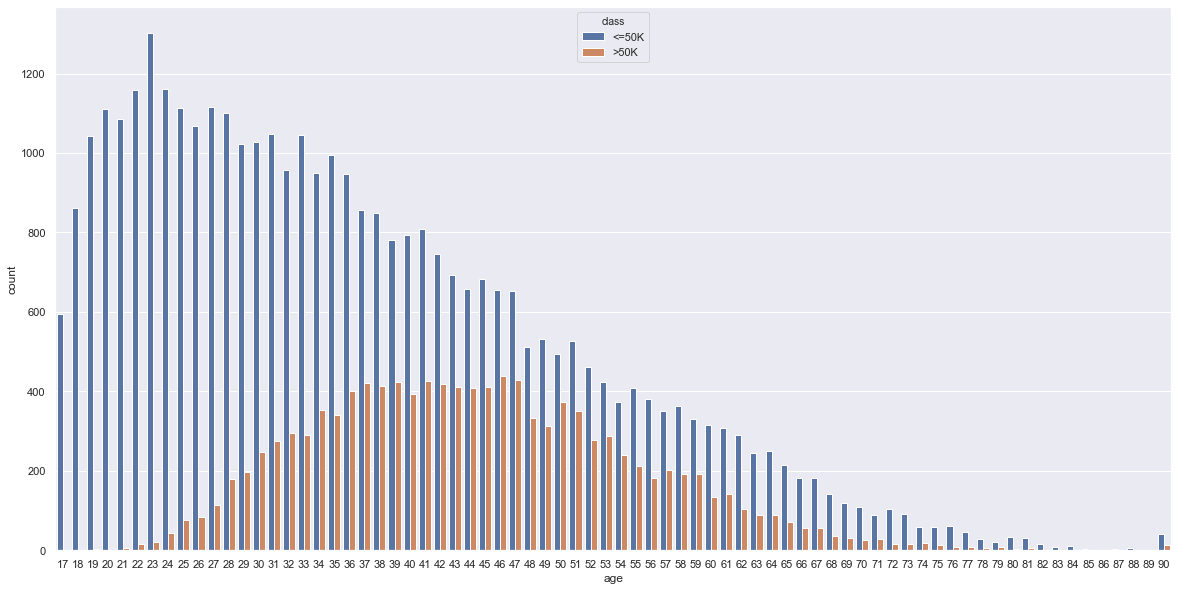

<Figure size 864x720 with 0 Axes>

In [32]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='age', hue="class", data=Adult)
plt.figure(figsize=(12, 10))
plt.show()

## Wiek i edukacja

C:\Users\jaiko\Anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning:

The following kwargs were not used by contour: 'hue'



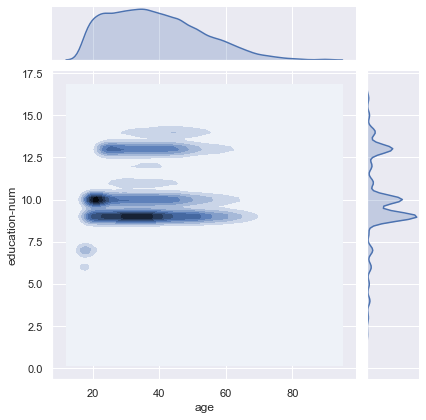

In [44]:
df = Adult[["age", "education-num", "class"]]
sns.jointplot(x="age", y="education-num", data=Adult, kind="kde");

## Godziny pracy a przychód

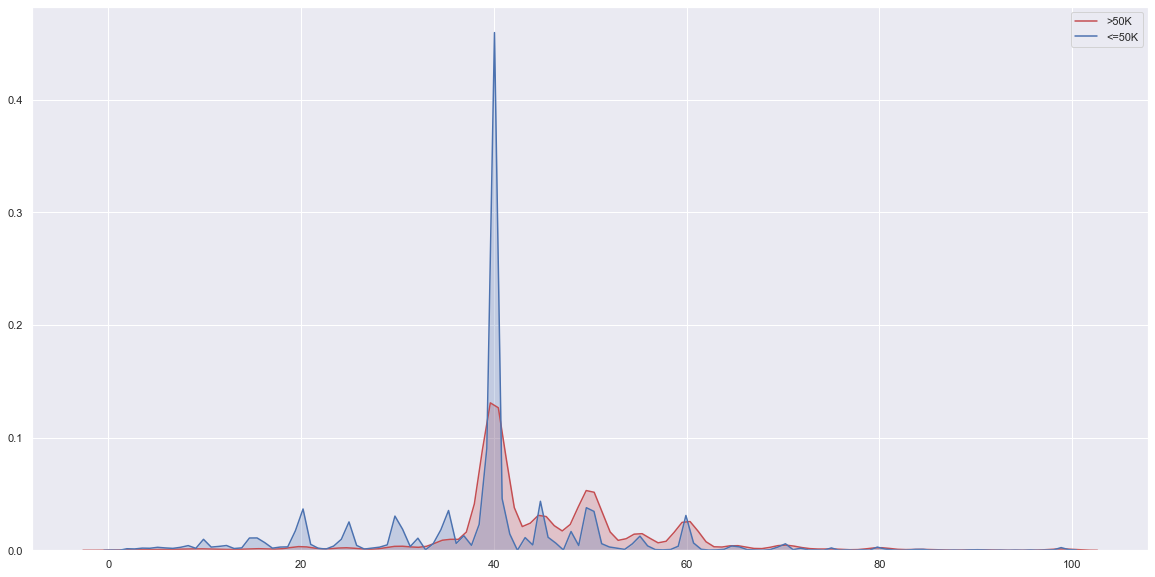

In [74]:
p1=sns.kdeplot(Adult[Adult.values == ">50K"]["hours-per-week"], shade=True, color="r",label='>50K')
p1=sns.kdeplot(Adult[Adult.values == "<=50K"]["hours-per-week"], shade=True, color="b",label='<=50K')
